<a id="table"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>

* [1. IMPORT LIBRARIES](#1)
사용 라이브러리
    
* [2. LOAD THE DATASET](#2)
데이터셋 가져오기
* [3. EXPLORATORY SOME INFORMATION ABOUT DATASET](#3)
데이터셋의 정보
* [4. EDA](#4)
데이터셋 분포 시각화
* [5. PREDICTION ](#5)
예측

 <span style="color:red;font-family:serif; font-size:28px;"> Let's get started! </span>

In [ ]:
'''
용어 간단 설명
age : 나이
sex : 성별
cp : 가슴 통증 타입
trtbps : 안정 혈압
chol : 콜레스테롤 수치
fbs : 공복 혈당
restecg : 안정 심전도 결과
thalachh : 최대 심박수
exng : 협심증을 유발하는 운동 여부
oldpeak : 
'''

<a id="1"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Import Libraries</h1>

In [64]:
'''
라이브러리 별 간단설명 주석문 추가
'''

import numpy as np # linear algebra
'''
과학 계산을 위한 라이브러리
행렬/배열 처리 및 연산
난수생성
'''
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
'''
데이터 처리와 분석을 위한 라이브러리
행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있음
대용량의 데이터들을 처리하는데 매우 편리
'''
import seaborn as sns 
'''
matplotlib 기반의 시각화 라이브러리
유익한 통계 그래픽을 그리기 위한 고급 인터페이스를 제공
'''
import matplotlib.pyplot as plt
'''
matplotlib.pyplot 모듈의 각각의 함수를 사용해서 간편하게 그래프를 만들고 변화를 줄 수 있음
'''
import missingno as msno
'''
결측치(missing value)를 체크하는 시각화 라이브러리
빠르게 결측치의 분포를 확인하고 싶을 때 사용 가능
'''
import plotly.graph_objs as go
import plotly.express as px
'''
파이썬에 수많은 데이터 시각화 라이브러리 중 예쁜 걸로 손에 꼽을만한 라이브러리
인터렉티브한 시각화가 가능함
'''
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
'''
어느 부분에서 쓰이는 지 아직 모르겠음
'''

<a id="2"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Load the Data</h1>

In [65]:
#df=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv") 기존 코드
df=pd.read_csv("C:\\workplace\\ossp_csv\\heart.csv") # 변경 코드
'''
심장마비 데이터셋
'''
#df1=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv") 기존 코드
df1=pd.read_csv("C:\\workplace\\ossp_csv\\o2Saturation.csv") # 변경 코드
'''
산소포화도 데이터셋
'''
df.head()
df1.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


<a id="3"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;"> Exploratary Some Information About Dataset</h1>

In [66]:
df1.rename(columns={"98.6": "Saturasyon"}, inplace=True)


In [67]:
data = pd.concat([df,df1], axis=1)


In [68]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturasyon
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5


In [69]:
data.isnull().sum()

age           3282
sex           3282
cp            3282
trtbps        3282
chol          3282
fbs           3282
restecg       3282
thalachh      3282
exng          3282
oldpeak       3282
slp           3282
caa           3282
thall         3282
output        3282
Saturasyon       0
dtype: int64

In [70]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturasyon
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,3585.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,98.239275
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.726336
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.600000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,98.600000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,98.600000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,99.600000


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    float64
 1   sex         303 non-null    float64
 2   cp          303 non-null    float64
 3   trtbps      303 non-null    float64
 4   chol        303 non-null    float64
 5   fbs         303 non-null    float64
 6   restecg     303 non-null    float64
 7   thalachh    303 non-null    float64
 8   exng        303 non-null    float64
 9   oldpeak     303 non-null    float64
 10  slp         303 non-null    float64
 11  caa         303 non-null    float64
 12  thall       303 non-null    float64
 13  output      303 non-null    float64
 14  Saturasyon  3585 non-null   float64
dtypes: float64(15)
memory usage: 420.2 KB


In [72]:
data.shape

(3585, 15)

In [73]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'Saturasyon'],
      dtype='object')

<a id="4"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;"> EDA</h1>

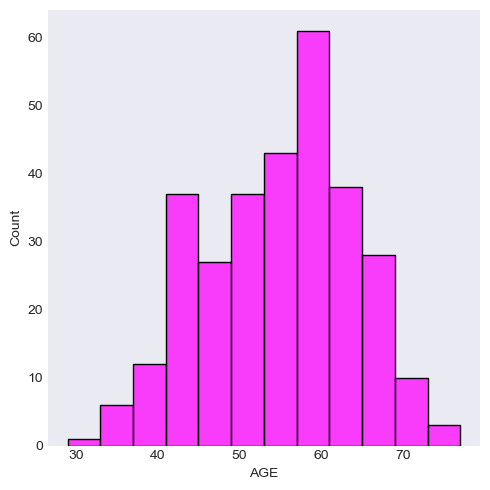

In [74]:
sns.displot(data=data, x="age", color="magenta")
plt.xlabel("AGE")
plt.show()

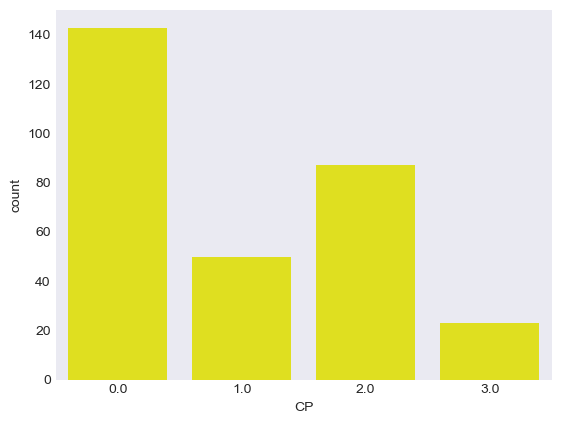

In [75]:
sns.countplot(data=data, x="cp", color="yellow")
plt.xlabel("CP")
plt.show()

# cp : Chest Pain type chest pain type

## Value 1: typical angina
## Value 2: atypical angina
## Value 3: non-anginal pain
## Value 4: asymptomatic

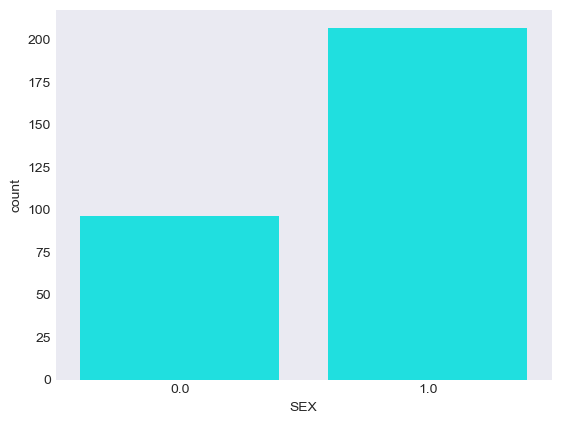

In [76]:
sns.countplot(data=data, x="sex", color="cyan")
plt.xlabel("SEX")
plt.show()

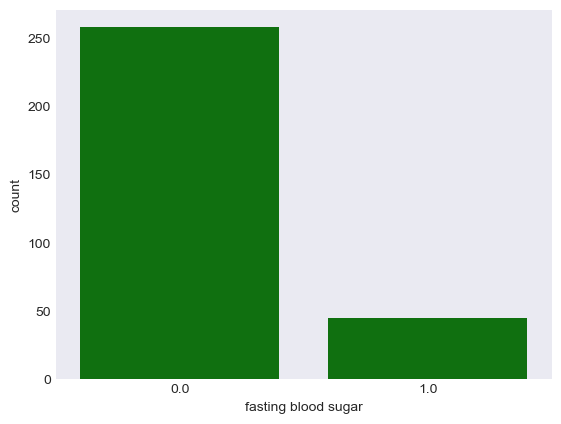

In [77]:
sns.countplot(data=data, x="fbs", color="green")
plt.xlabel("fasting blood sugar")
plt.show()

# fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

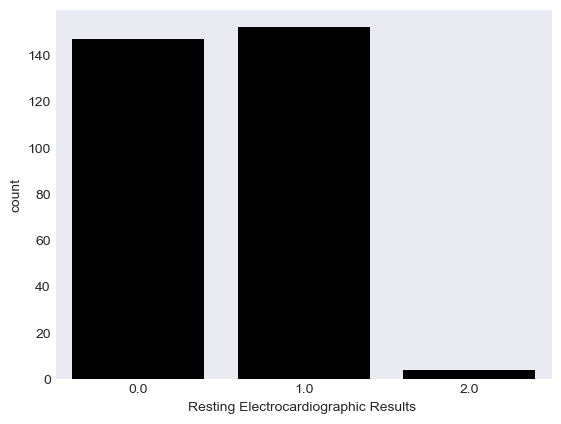

In [78]:
sns.countplot(data=data, x="restecg", color="black")
plt.xlabel("Resting Electrocardiographic Results ")
plt.show()

# rest_ecg : resting electrocardiographic results

## Value 0: normal
## Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
## Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

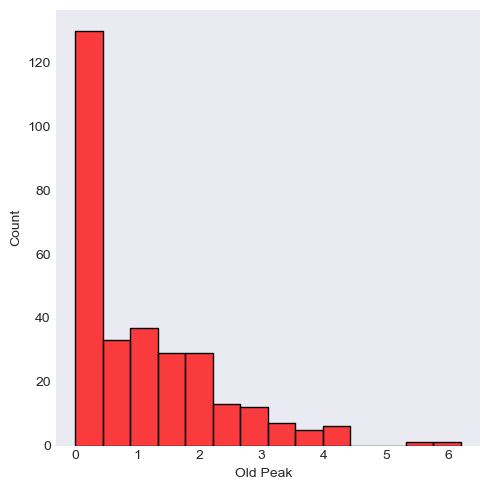

In [79]:
sns.displot(data=data, x="oldpeak", color="red")
plt.xlabel("Old Peak  ")
plt.show()

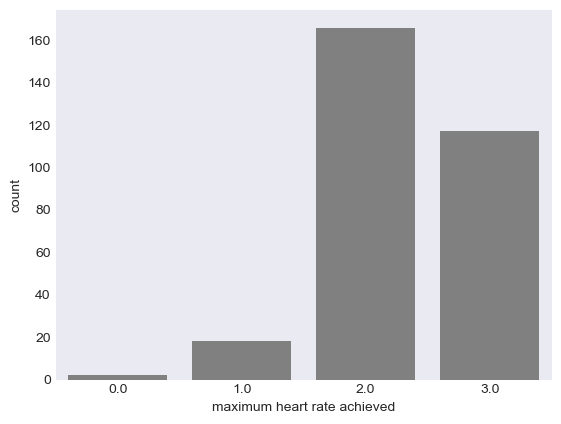

In [80]:
sns.countplot(data=data, x="thall", color="gray")
plt.xlabel("maximum heart rate achieved")
plt.show()

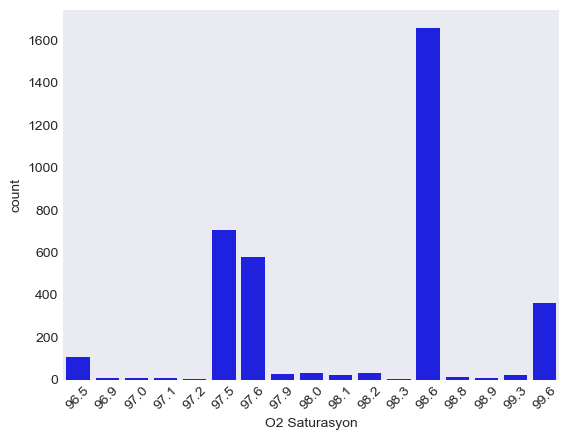

In [81]:
sns.countplot(data=data, x="Saturasyon", color="blue")
plt.xticks(rotation=45)
plt.xlabel("O2 Saturasyon")
plt.show()

In [82]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturasyon
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5


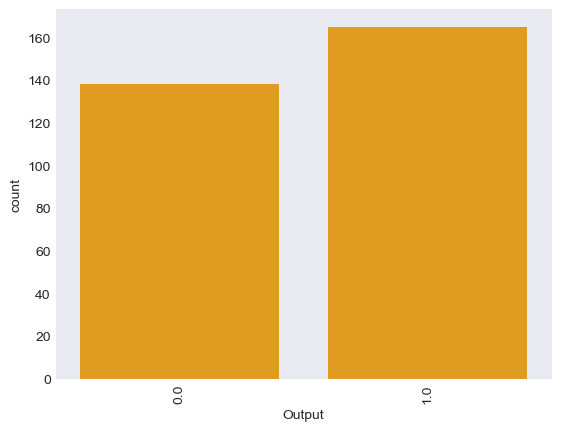

In [83]:
sns.countplot(data=data, x="output", color="orange")
plt.xticks(rotation=90)
plt.xlabel("Output")
plt.show()

<a id="5"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Prediction </h1>

In [84]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score



In [85]:
data_len=len(data)

In [86]:
data_len

3585

In [87]:
test=data[:data_len]
test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturasyon
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6


In [88]:
data = data[np.isfinite(data).all(1)]


In [89]:
X_train = data.drop(labels = "output", axis = 1)
y_train = data["output"]

In [90]:
y_train = data["output"]
y_train

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
298    0.0
299    0.0
300    0.0
301    0.0
302    0.0
Name: output, Length: 303, dtype: float64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)


In [92]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 203
X_test 100
y_train 203
y_test 100
test 3585


In [93]:
logreg = LogisticRegression()

In [94]:
logreg.fit(X_train, y_train)

C:\Users\user\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [95]:

acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 89.16
Testing Accuracy: % 81.0


In [96]:
random_state=42

classifier=[DecisionTreeClassifier(random_state=random_state),
           SVC(random_state=random_state),
           RandomForestClassifier(random_state=random_state),
           LogisticRegression(random_state=random_state,solver='lbfgs', max_iter=1000),
           KNeighborsClassifier()]

In [97]:
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(1,3,5),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [98]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.7785714285714286
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.659047619047619
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8666666666666666
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\user\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _ch

0.8566666666666667
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.6738095238095239


C:\Users\user\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


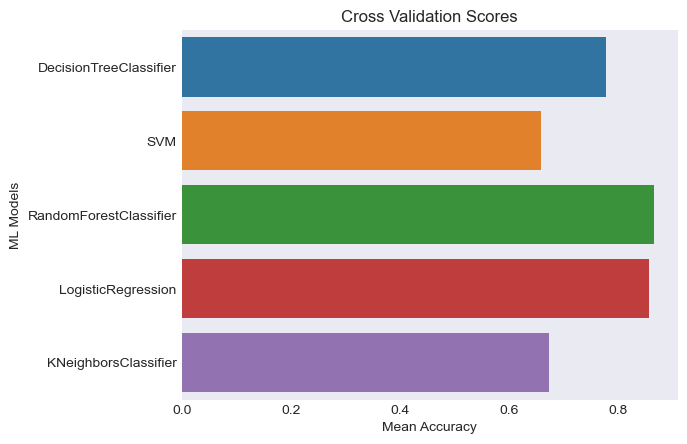

In [99]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.show()